In [5]:
#!pip install tensorflow

In [6]:
#!pip install keras

## Importing Libraries

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv(r"C:\Users\VivekSharma\Downloads\Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## Data Wrangling

In [9]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

## Missing Value Treatment

In [10]:
data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

## Encoding

In [12]:
data=pd.get_dummies(data,drop_first=True)

<Axes: xlabel='Balance', ylabel='EstimatedSalary'>

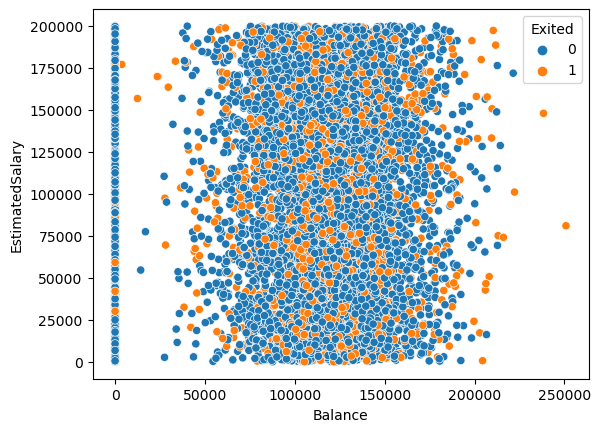

In [38]:
sns.scatterplot(x='Balance',y='EstimatedSalary',hue='Exited',data=data)

## Train_Test_Split

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [16]:
X=data.drop('Exited',axis=1)
y=data.Exited

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2)

In [19]:
print(xtrain.shape)
print(ytrain.shape)

(8000, 11)
(8000,)


## Scaling

In [27]:
ss=StandardScaler()
xtrain_scale=xtrain.copy()
for i in xtrain.columns:
    xtrain_scale.loc[:,i]=ss.fit_transform(pd.DataFrame(xtrain.loc[:,i]))
xtest_scale=xtest.copy()
for i in xtest.columns:
    xtest_scale.loc[:,i]=ss.fit_transform(pd.DataFrame(xtest.loc[:,i]))

In [32]:
xtrain.shape

(8000, 11)

## Deep Learning Model- Artifical Neural Network

### Importing Libraries for deep learning

In [31]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential     #for ann
from tensorflow.keras.layers import Dense   #for hidden layer

In [33]:
model=Sequential()

model.add(Dense(3,activation='sigmoid',input_dim=11)) #1st hidden layer with 3 node receiving 11 inputs 
model.add(Dense(1,activation='sigmoid'))              #output layer with 1 node will receive 3 inputs

In [39]:
model.summary()

#1st hidden layer parameters = 11 X 3(weights) + 3(bias) =36

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 36        
                                                                 
 dense_1 (Dense)             (None, 1)                 4         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 40 (160.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [40]:
#model compilation stage where we define loss function and optimizer
model.compile(loss='binary_crossentropy',optimizer='Adam')

In [41]:
#fitting model -- Stage where training is done

model.fit(xtrain_scale,ytrain,epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4994
Epoch 2/10
250/250 [==============================] - 0s 2ms/step - loss: 0.4758
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4604
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4496
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4420
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4367
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4331
Epoch 8/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4304
Epoch 9/10
250/250 [==============================] - 1s 3ms/step - loss: 0.4282
Epoch 10/10
250/250 [==============================] - 1s 2ms/step - loss: 0.4266


In [42]:
##hence training is done which means algorithm has findout optimum value of weights and bias (Total=40) 

In [45]:
model.layers[0].get_weights() #1stlayer 33 weights and 3 bias

[array([[-1.05870120e-01,  1.62092477e-01,  1.58073947e-01],
        [-7.59626389e-01, -1.02388024e+00, -1.24307680e+00],
        [ 2.89092883e-02, -1.15555204e-01,  1.69297218e-01],
        [-5.12862623e-01, -1.23854205e-01, -7.85401673e-04],
        [ 8.55734805e-04,  3.04983892e-02,  1.57141358e-01],
        [-1.85450017e-02, -3.44404697e-01,  2.82200694e-01],
        [ 1.04009187e+00,  9.41810310e-02,  3.92703146e-01],
        [-1.72750697e-01, -6.49536923e-02,  9.87042952e-03],
        [-7.59077191e-01,  9.93009433e-02, -6.30414546e-01],
        [ 6.72363415e-02,  3.36909652e-01, -2.99587905e-01],
        [ 2.22621143e-01,  1.91180065e-01,  5.52778363e-01]], dtype=float32),
 array([ 0.04583324, -0.20225385, -0.03700642], dtype=float32)]

In [46]:
model.layers[1].get_weights() #1stlayer 3 weights and  1 bias

[array([[-1.3523738 ],
        [-0.98821825],
        [-1.579575  ]], dtype=float32),
 array([0.3058396], dtype=float32)]

## Prediction

In [52]:
pred_prob=model.predict(xtest_scale)

63/63 [==============================] - 0s 1ms/step


In [75]:
pred1=list(map(lambda x: 1 if x>0.5 else 0, list(pred_prob)))
pred2=np.where(pred_prob>0.5,1,0)

## Accuracy 

In [72]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [73]:
def func(act,pred):
    print(confusion_matrix(act,pred))
    print(accuracy_score(act,pred))
    print(classification_report(act,pred))

In [76]:
func(ytest,pred1)

#recall of 1 customers who exited is 12% which is not so good , in our case lets try to understand which problem is much big FN
# or FP .
# RECALL- FN(CUSTOMER IS EXITED(LEAVING COMPANY) BUT MODEL PREDICT NOT EXITED(STAY WITH COMPANY))
# PRECISION- FP(CUSTOMER IS NOT EXITED(STAY WITH COMPANY) BUT MODEL PREDICT EXITED(LEAVING COMPANY))

# IF COMPANY FAILS TO IDENTIFY WHICH CUSTOMERS ARE LEAVING THEN THEY WILL LOOSE THE BUSINESS  -- MAJOR ISSUE
# ELSE COMPANY WILL SPEND MORE ON MARKETING FOR CUSTOMERS WHO ARE ALREADY THIER CUSTOMERS

[[1562   23]
 [ 364   51]]
0.8065
              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1585
           1       0.69      0.12      0.21       415

    accuracy                           0.81      2000
   macro avg       0.75      0.55      0.55      2000
weighted avg       0.79      0.81      0.75      2000



## MODEL TUNNING 

In [77]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11)) # RELU PERFORM WELL USUALLY, NODES CAN BE INCREASE FROM 3
model.add(Dense(11,activation='relu'))              # ADDING ANOTHER HIDDEN LAYER
model.add(Dense(1,activation='sigmoid'))  

In [87]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [101]:
history=model.fit(xtrain_scale,ytrain,epochs=10,validation_split=0.2)  #epochs changed into 100

Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.3001 - accuracy: 0.8764 - val_loss: 0.3820 - val_accuracy: 0.8413
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8766 - val_loss: 0.3818 - val_accuracy: 0.8487
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3003 - accuracy: 0.8786 - val_loss: 0.3799 - val_accuracy: 0.8469
Epoch 4/10
200/200 [==============================] - 1s 3ms/step - loss: 0.2994 - accuracy: 0.8783 - val_loss: 0.3865 - val_accuracy: 0.8512
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8783 - val_loss: 0.3814 - val_accuracy: 0.8487
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3002 - accuracy: 0.8772 - val_loss: 0.3806 - val_accuracy: 0.8444
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3001 - accuracy: 0.8786 - val_loss: 0.3802 - val_accuracy: 0.8450
Epoch 

In [90]:
pred_prob=model.predict(xtest_scale)
pred1=np.where(pred_prob>0.5,1,0)

63/63 [==============================] - 0s 2ms/step


In [91]:
func(ytest,pred1)

[[1511   74]
 [ 205  210]]
0.8605
              precision    recall  f1-score   support

           0       0.88      0.95      0.92      1585
           1       0.74      0.51      0.60       415

    accuracy                           0.86      2000
   macro avg       0.81      0.73      0.76      2000
weighted avg       0.85      0.86      0.85      2000



## Graphical method

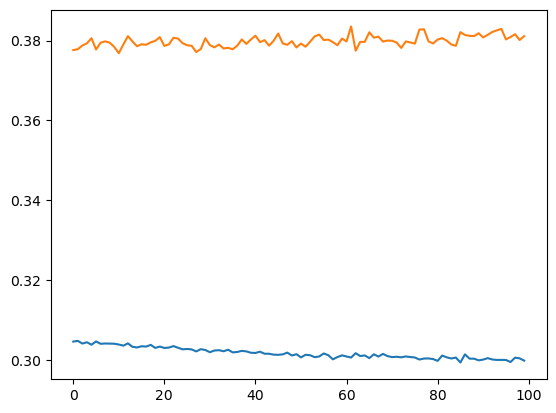

In [98]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

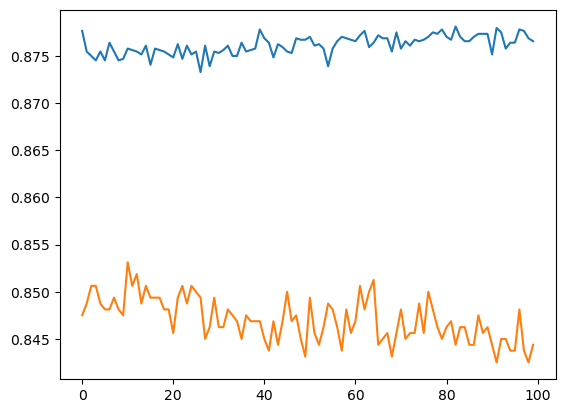

In [100]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [103]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(xtrain_scale,ytrain)
pred=model.predict(xtest_scale)
func(ytest,pred)

[[1522   63]
 [ 203  212]]
0.867
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1585
           1       0.77      0.51      0.61       415

    accuracy                           0.87      2000
   macro avg       0.83      0.74      0.77      2000
weighted avg       0.86      0.87      0.86      2000

